Импортируем все нужные библиотеки. 
Задание 1. Установим столбец даты, как индекс таблицы. И построим график. Проделаем это для четырех таблиц

Таблица с DAU:

In [289]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
dau = pd.read_excel('hw_lesson03_dau (1).xlsx')
daudat = pd.DataFrame(dau)
daudat = daudat.set_index('date')
daudat.head()

,date,DAU
0,2020-04-01,1134
1,2020-04-02,1427
2,2020-04-03,1741
3,2020-04-04,1921
4,2020-04-05,1942


Text(0.5, 1.0, 'DAU в указанные даты')

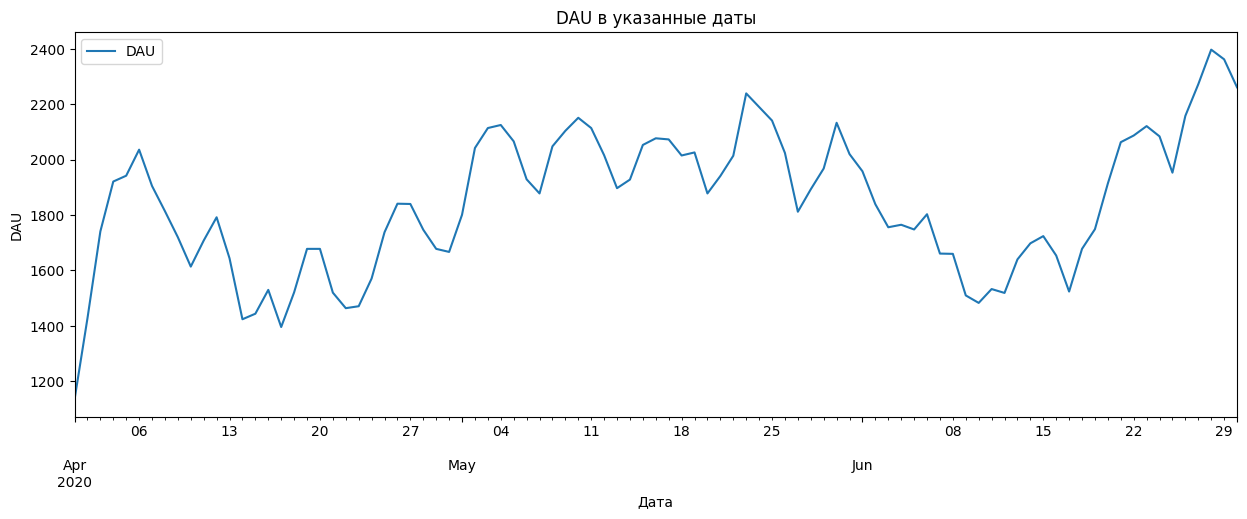

In [98]:
daudat.plot(figsize = (15, 5))
plt.xlabel('Дата')
plt.ylabel('DAU')
plt.title('DAU в указанные даты')

Таблица с девайсами:

In [88]:
dau1 = pd.read_excel('hw_lesson03_dau_device.xlsx')
daudev =pd.DataFrame(dau1)
daudev = daudev.set_index('date')
daudev.head()

,Andoroid,iPhone
date,,
2020-04-01,786,348
2020-04-02,996,431
2020-04-03,1193,548
2020-04-04,1307,614
2020-04-05,1297,645


Text(0.5, 1.0, 'Зависимость DAU от устройств пользователей в указанные даты')

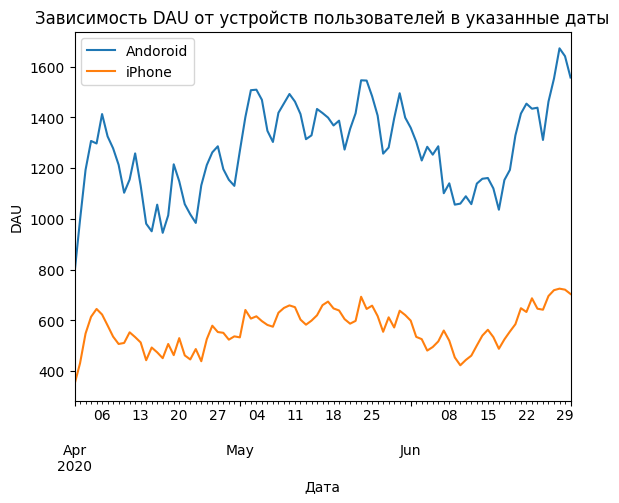

In [99]:
daudev.plot()
plt.xlabel('Дата')
plt.ylabel('DAU')
plt.title('Зависимость DAU от устройств пользователей в указанные даты')

Таблица с каналами трафика:

In [126]:
dau2 = pd.read_excel('hw_lesson03_dau_channel.xlsx')
dauchan = pd.DataFrame(dau2)
dauchan = dauchan.set_index('date')
dauchan.head()

,BrainPlus,GameAds,JetAds,SenseAds
date,,,,
2020-04-01,627,292,159,56
2020-04-02,761,322,235,109
2020-04-03,887,427,306,121
2020-04-04,966,466,341,148
2020-04-05,951,479,346,166


Text(0.5, 1.0, 'Зависимость DAU от рекламного канала в указанные даты')

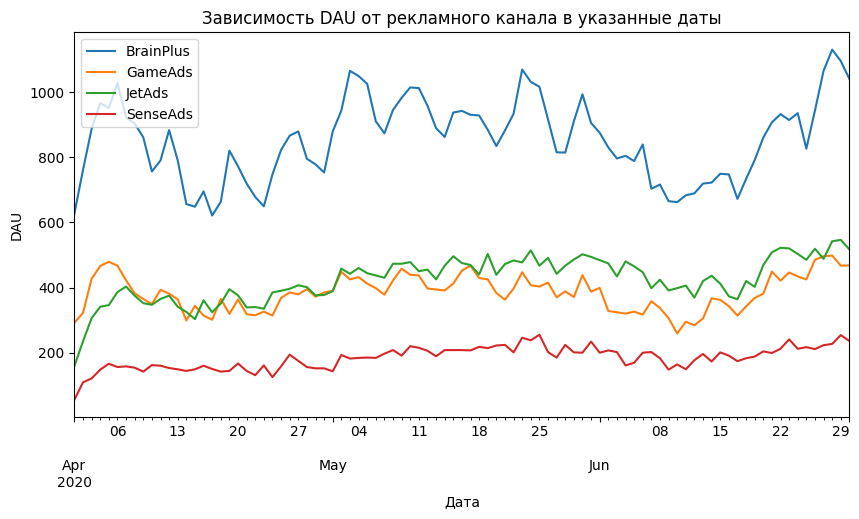

In [127]:
dauchan.plot(figsize = (10, 5))
plt.xlabel('Дата')
plt.ylabel('DAU')
plt.title('Зависимость DAU от рекламного канала в указанные даты')

Таблица с регионами

In [101]:
dau3 = pd.read_excel('hw_lesson03_dau_region.xlsx')
daureg = pd.DataFrame(dau3)
daureg = daureg.set_index('date')
daureg.head()

,Africa,Australia,CIS,CN,Europe,North America,SEA,South America
date,,,,,,,,
2020-04-01,91,60,167,223,158,203,102,130
2020-04-02,113,94,218,283,198,230,115,176
2020-04-03,166,90,282,320,264,274,153,192
2020-04-04,151,101,311,346,295,338,159,220
2020-04-05,156,95,323,351,277,359,164,217


Text(0, 0.5, 'DAU')

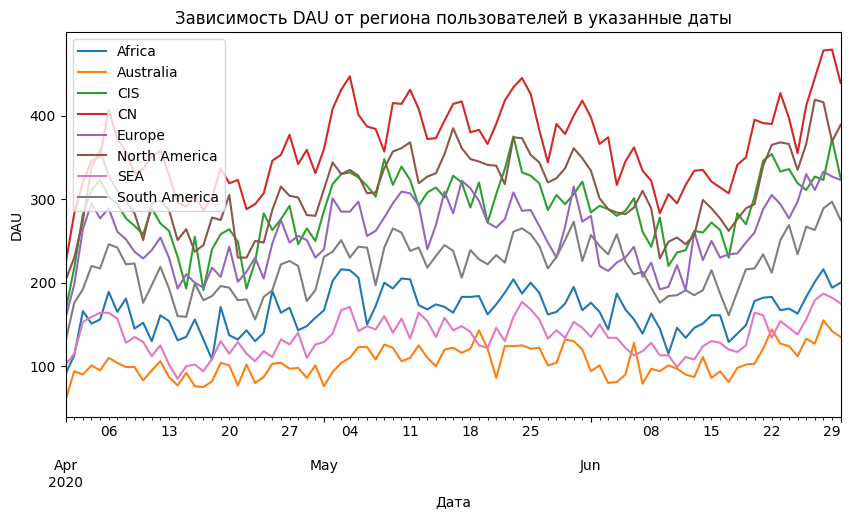

In [109]:
daureg.plot(figsize = (10, 5))
plt.title('Зависимость DAU от региона пользователей в указанные даты')
plt.xlabel('Дата')
plt.ylabel('DAU')

Наблюдения и выводы:
Максимальный DAU за все времяне превысил 2500 пользователей
Владельцы андроид пользуются нашим продуктом чаще, чем владельцы айфон
Китай - каждый день количество уникальных пользователей нащего продукта оттуда больше, чем в остальных регионах
BrainPlus - самый продуктивный канал трафика

Задание 2

Рассчитаем медианный DAU для каждого канала трафика

In [121]:
int(dau2['BrainPlus'].median()), int(dau2['GameAds'].median()), int(dau2['JetAds'].median()), int(dau2['SenseAds'].median())

(866, 385, 434, 188)

Добавим столбец итого в Датафрейм с каналами трафика

In [129]:
dauchan = dauchan.assign(Итого = dauchan['GameAds'] + dauchan['JetAds'] + dauchan['SenseAds'] + dauchan['BrainPlus'])
dauchan.head()

,BrainPlus,GameAds,JetAds,SenseAds,Итого
date,,,,,
2020-04-01,627,292,159,56,1134
2020-04-02,761,322,235,109,1427
2020-04-03,887,427,306,121,1741
2020-04-04,966,466,341,148,1921
2020-04-05,951,479,346,166,1942


Создадим новый Датафрейм, в столбцах которого расположены отношение DAU через данный канал трафика к DAU через все каналы трафика

In [181]:
dauchanpr = dauchan
dauchanpr = dauchanpr.assign(BrainPlus = (dauchanpr['BrainPlus']*100/dauchanpr['Итого']))
dauchanpr = dauchanpr.assign(GameAds = (dauchanpr['GameAds']*100/dauchanpr['Итого']))
dauchanpr = dauchanpr.assign(JetAds = (dauchanpr['JetAds']*100/dauchanpr['Итого']))
dauchanpr = dauchanpr.assign(SenseAds = (dauchanpr['SenseAds']*100/dauchanpr['Итого']))
dauchanpr = dauchanpr.drop('Итого', axis='columns')
dauchanpr = dauchanpr.round()
dauchanpr


,BrainPlus,GameAds,JetAds,SenseAds
date,,,,
2020-04-01,55.0,26.0,14.0,5.0
2020-04-02,53.0,23.0,16.0,8.0
2020-04-03,51.0,25.0,18.0,7.0
2020-04-04,50.0,24.0,18.0,8.0
2020-04-05,49.0,25.0,18.0,9.0
...,...,...,...,...
2020-06-26,44.0,22.0,24.0,10.0
2020-06-27,47.0,22.0,21.0,10.0
2020-06-28,47.0,21.0,23.0,9.0


Построим график типа область с накоплением

Text(0, 0.5, 'относительное DAU')

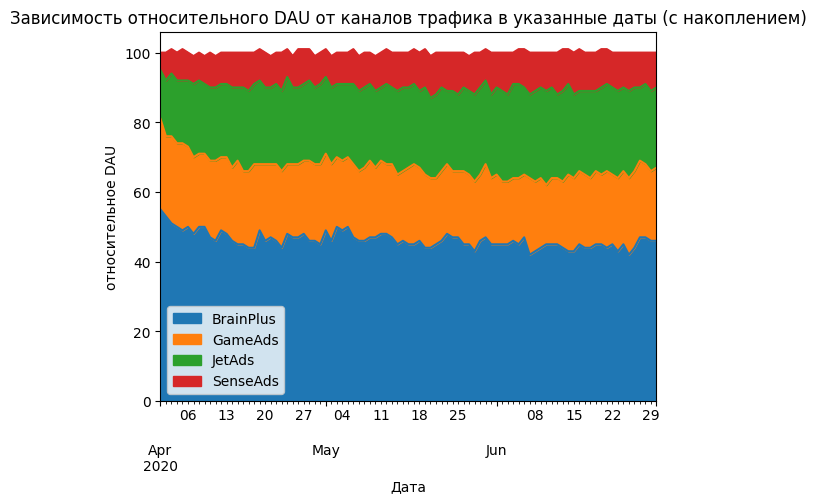

In [180]:
dauchanpr.plot.area()
plt.title('Зависимость относительного DAU от каналов трафика в указанные даты (с накоплением)')
plt.xlabel('Дата')
plt.ylabel('относительное DAU')

Наблюдения и выводы: Медианный DAU через канал BrainPlus почти выше, чем через все остальные каналы вместе взятые => это самый полезный канал, и рекламироваться нужно теперь только через этот канал
Канал SenseAds перегоняет очень мало трафика по сравнению с остальными, с ним можно прекратить сотрудничество
На протяжении всего времени более 40% всего трафика приходится на канал BrainPlus

Задание 3

Установить столбец месяц, как индекс таблицы

In [281]:
mau = pd.read_excel('hw_lesson03_mau_region.xlsx')
maureg = pd.DataFrame(mau)
maureg.set_index('month')

,Africa,Australia,CIS,CN,Europe,North America,SEA,South America
month,,,,,,,,
4,2490,1534,4229,5392,3845,4639,2058,3241
5,3190,1937,5432,6884,4872,5930,2587,4119
6,2805,1846,4941,6225,4387,5383,2361,3805


Заменим значение MAU в Африке в мае на 5000

In [283]:
maureg.iloc[1, 1] = 5000
maureg

,month,Africa,Australia,CIS,CN,Europe,North America,SEA,South America
0,4,2490,1534,4229,5392,3845,4639,2058,3241
1,5,5000,1937,5432,6884,4872,5930,2587,4119
2,6,2805,1846,4941,6225,4387,5383,2361,3805


Добавим столбец Af+Au, вывдящий сумму значений MAU  в Африке и Австралии, если она больше, чем в СНГ, в противном случае выводится 0 

In [268]:
def f(x):
    if x['Africa'] + x['Australia'] > x['CIS']:
        return x['Africa'] + x['Australia']
    else:
        return 0
maureg['Af+Au'] = maureg.apply(f, axis = 1)
maureg


,month,Africa,Australia,CIS,CN,Europe,North America,SEA,South America,Af+Au
0,4,2490,1534,4229,5392,3845,4639,2058,3241,0
1,5,5000,1937,5432,6884,4872,5930,2587,4119,6937
2,6,2805,1846,4941,6225,4387,5383,2361,3805,0


Добавим столбец ЕС превышает порог, значением которого будет являться True, если в этом месяце значение MAU  в Европе >= 4000, иначе выведется False

In [280]:
maureg['ЕС превышает порог'] = maureg['Europe']>=4000
maureg

,month,Africa,Australia,CIS,CN,Europe,North America,SEA,South America,ЕС превышает порог
0,4,2490,1534,4229,5392,3845,4639,2058,3241,False
1,5,3190,1937,5432,6884,4872,5930,2587,4119,True
2,6,2805,1846,4941,6225,4387,5383,2361,3805,True


Задание 4. Создадим функцию, которая по ссылке на таблицу будет выдавать ее, ее линейный график, ее график долей пользователей

C:\Users\user\AppData\Local\Temp\ipykernel_25560\271639208.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.024691358024691' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  y.iloc[i, j] = y.iloc[i, j]*100/y.iloc[i, len(y.axes[1])-1]
C:\Users\user\AppData\Local\Temp\ipykernel_25560\271639208.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.291005291005291' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  y.iloc[i, j] = y.iloc[i, j]*100/y.iloc[i, len(y.axes[1])-1]
C:\Users\user\AppData\Local\Temp\ipykernel_25560\271639208.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '14.72663139329806' has dtype incompatible with int64, please explicitly cast to

(              Africa  Australia        CIS         CN     Europe  \
 date                                                               
 2020-04-01  8.024691   5.291005  14.726631  19.664903  13.932981   
 2020-04-02  7.918711   6.587246  15.276804  19.831815  13.875263   
 2020-04-03  9.534750   5.169443  16.197588  18.380241  15.163699   
 2020-04-04  7.860489   5.257678  16.189485  18.011452  15.356585   
 2020-04-05  8.032956   4.891864  16.632338  18.074150  14.263646   
 ...              ...        ...        ...        ...        ...   
 2020-06-26  8.480074   6.163114  14.411492  19.091752  15.291937   
 2020-06-27  8.846831   5.589789  14.392606  19.586268  13.688380   
 2020-06-28  9.011264   6.466416  13.475177  19.941594  13.892365   
 2020-06-29  8.213378   6.011854  15.749365  20.279424  13.844200   
 2020-06-30  8.845644   5.970809  14.374171  19.416188  14.285714   
 
             North America       SEA  South America  
 date                                          

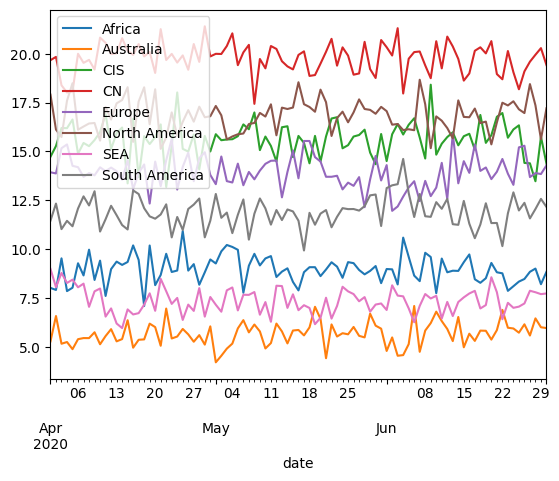

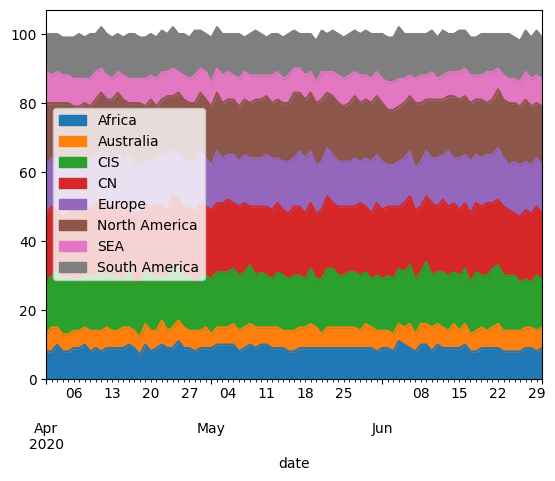

In [340]:
link = input() 
def f(n):
    l = pd.read_excel('hw_lesson03_dau_region.xlsx')
    x = pd.DataFrame(l)
    m = (x.iloc[:, 0]).name
    x = x.set_index(str(m))
    x['Total'] = 0
    for i in range(len(x.axes[0])):
        for j in range(len(x.axes[1])-1):
            x.iloc[i, len(x.axes[1])-1] += x.iloc[i, j]
    y = x
    for i in range(len(y.axes[0])):
        for j in range(len(y.axes[1])-1):
            y.iloc[i, j] = y.iloc[i, j]*100/y.iloc[i, len(y.axes[1])-1]
    y = y.round()
    y.pop('Total')
    x.pop('Total')
    return x, x.plot(), y.plot.area()
f(link) 